[*********************100%***********************]  1 of 1 completed
Epoch 1/3
1098/1098 [==============================] - 23s 18ms/step - loss: 8.8173e-04
Epoch 2/3
1098/1098 [==============================] - 21s 19ms/step - loss: 3.1853e-04
Epoch 3/3
10/10 [==============================] - 1s 12ms/step


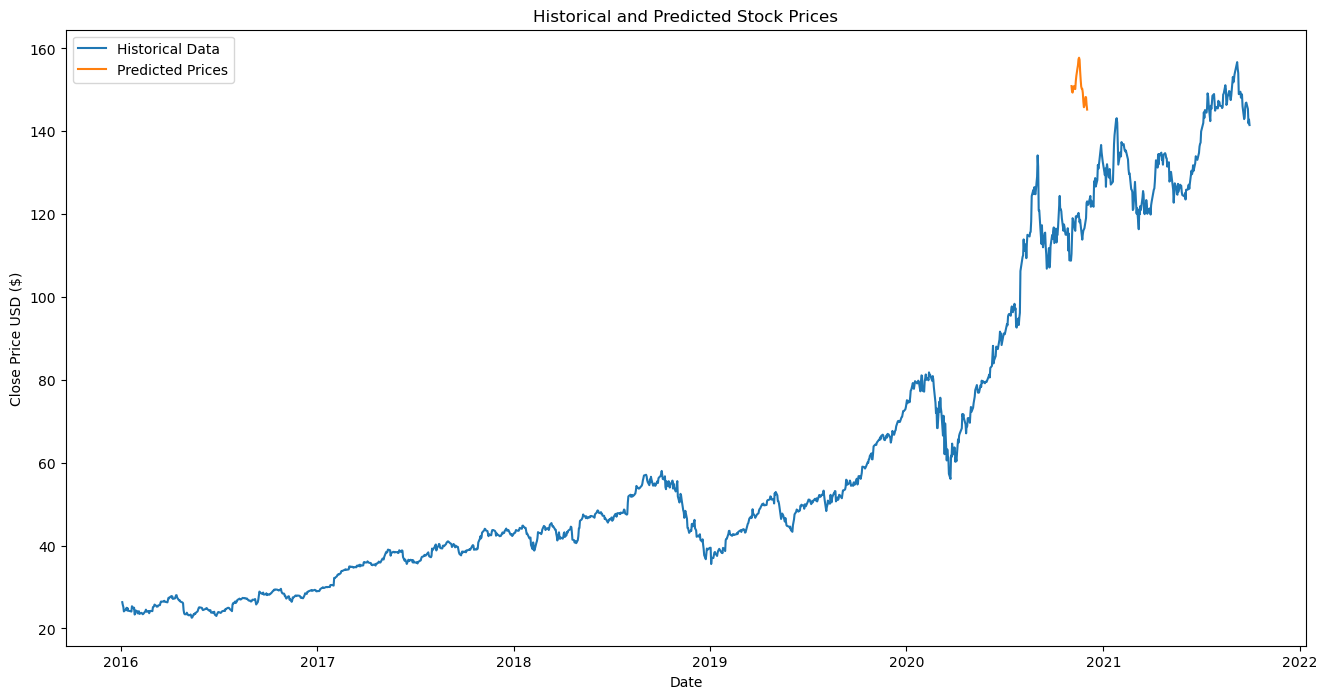

In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download stock data
stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')

# Extract closing prices
close_prices = stock_data['Close']
values = close_prices.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

# Prepare training data
training_data_len = math.ceil(len(values) * 0.8)
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train the model
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

# Prepare test data for predictions
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions for the next 30 days
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Reshape predictions array
predictions = predictions[-30:]  # Select the last 30 predictions
predictions = predictions.reshape(-1)

# Create a DataFrame with predicted prices
dates = pd.date_range(start=stock_data.index[training_data_len+60], periods=30, freq='D')
predicted_prices = pd.DataFrame(predictions, index=dates, columns=['Predicted Price'])

# Plotting historical data and predicted prices
plt.figure(figsize=(16,8))
plt.title('Historical and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(stock_data['Close'], label='Historical Data')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend(loc='upper left')
plt.show()


[*********************100%***********************]  1 of 1 completed
Epoch 1/3
1098/1098 [==============================] - 23s 18ms/step - loss: 7.8008e-04
Epoch 2/3
1098/1098 [==============================] - 21s 19ms/step - loss: 4.1068e-04
Epoch 3/3
1/1 [==============================] - 0s 22ms/step


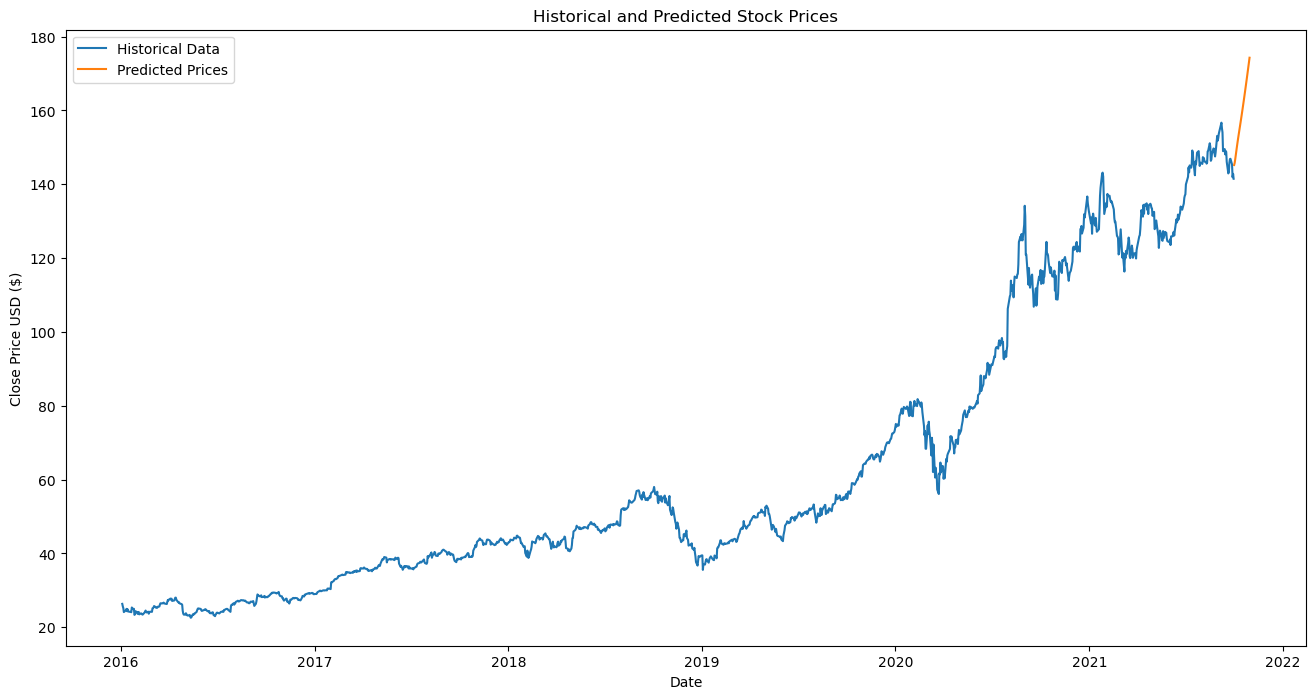

In [2]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download stock data
stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')

# Extract closing prices
close_prices = stock_data['Close']
values = close_prices.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

# Prepare training data
training_data_len = math.ceil(len(values) * 0.8)
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build and train the model
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

# Prepare test data for predictions
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions for the future
future_periods = 30
x_future = x_test[-1]  # Use the last available sequence as the starting point

future_predictions = []
for _ in range(future_periods):
    x_future = np.reshape(x_future, (1, x_future.shape[0], 1))
    future_prediction = model.predict(x_future)
    future_predictions.append(future_prediction[0, 0])
    x_future = np.append(x_future[0][1:], future_prediction)

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame with predicted prices
future_dates = pd.date_range(start=stock_data.index[-1] + pd.DateOffset(days=1), periods=future_periods, freq='D')
predicted_prices = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Price'])

# Plotting historical data and predicted prices
plt.figure(figsize=(16,8))
plt.title('Historical and Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(stock_data['Close'], label='Historical Data')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Display the DataFrame with predicted prices
print(predicted_prices)